In [2]:
import pandas as pd 
import numpy as np


data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
data


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


# Introdução:
#### Neste trabalho foi analisado as informações da base de dados Metro_Interstate_Traffic_Volume.csv com o intuito de implementar dois algoritimos de aprendizado de maquina visando fazer a regressão e tentar prever o trafego a partir das informações dadas e comparar o desempenho desses algoritimos utilizando split e com uso de validação cruzada em dez grupos

In [3]:
import matplotlib.pyplot as plt

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000


#### Acima foi mostrada a matriz de correlação e foi visto que não existe alta correlação entre nenhuma classe e abaixo foi analizado as médias e o desvio padrão de cada classe para saber se os valores estão condizentes com as médias. A partir disso os valores snow_1h foi retirado por demonstrar que não influencia para o aumento ou diminuição do trafego bem como date_time uma vez que não mostra relação com o aumento ou diminuição do trafego

In [203]:
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


#### Checagem de valores nulos ou duplicados

In [204]:
print('Valores faltando: ', data.isnull().sum)
print('Valores duplicados: ',data.duplicated())

Valores faltando:  <bound method DataFrame.sum of        holiday   temp  rain_1h  snow_1h  clouds_all  weather_main  \
0        False  False    False    False       False         False   
1        False  False    False    False       False         False   
2        False  False    False    False       False         False   
3        False  False    False    False       False         False   
4        False  False    False    False       False         False   
...        ...    ...      ...      ...         ...           ...   
48199    False  False    False    False       False         False   
48200    False  False    False    False       False         False   
48201    False  False    False    False       False         False   
48202    False  False    False    False       False         False   
48203    False  False    False    False       False         False   

       weather_description  date_time  traffic_volume  
0                    False      False           False  
1        

#### Transformando os valores de holiday, date_time,weather_description,weather_main de string para valores quantitativos

In [205]:
from sklearn import cluster, neighbors, svm, metrics, preprocessing 
le = preprocessing.LabelEncoder()
for columns in data.columns:
     if data[columns].dtypes == 'object':
        data[columns] = le.fit_transform(data[columns])





#### Removendo snow_1h e date_time

In [206]:
data = data.drop(['snow_1h','date_time'],axis=1)


#### Definindo o modelo de regressão linear para o ser o primeiro algoritimo nesse com setenta por cento da base para treino e os trinta por cento restante para validação

In [207]:
from sklearn import linear_model,model_selection
from sklearn import preprocessing 
reg = linear_model.LinearRegression()
X = data.iloc[:,0:6]
y = data.iloc[:,6]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=101)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)


MAE: 1694.2601378071356
MSE: 3796433.1599442554
RMSE: 1948.4437790052489


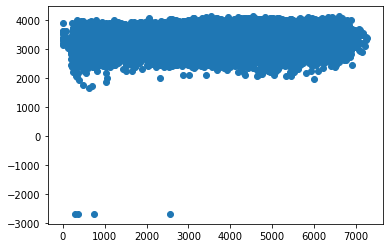

In [208]:
from sklearn import metrics
import seaborn as sns
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
plt.scatter(y_test,y_pred)


#### Os valores encontrados representam o erro absoluto médio,o erro medio quadratico ou seja isso significa que na média a regressão linear está errando a previsão do trafego em 1600 o que mostra que talvez esse problema seja complexo demais paro o uso de uma regressão linear que como o prorpio nome já diz consiste em tentar traçar uma reta que consiga predizer o comportamento do alvo a ser previsto.
#### Olhando agora para o grafico pode-se ter a certeza que esse algorfitimo é demasiadamente simples para esse tipo de problema uma vez que no grafico de disperção quanto mais proximo de uma reta melhor e o gráfico em questão se diferencia de modo bastante notavel de uma reta

#### O codigo abaixo se trata de uma regressão gaussiana para ser o segundo algoritimo a ser implementado , sua implementação se deu pelo motivo de sua previsão não ser uma reta portanto esperando melhores resultados e pelo fato dela ser uma teb=ntativa mais probabilistica (busca mais um itervalo de confiança empirico).

In [209]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_predg = gnb.fit(X_train, y_train).predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test,y_predg))
print('MSE:', metrics.mean_squared_error(y_test,y_predg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predg)))


MAE: 2250.3811367722305
MSE: 7629543.490803485
RMSE: 2762.1628284377957


#### Como observado pelos resultados acima a regressão gaussiana está distante de um resultado ideal para o problema proposto, após analise dos valores fica inegavel que a regressão gaussiana também é não é uma boa solução para o problema

#### Agora o teste é feito com a validação cruzada para avaliar se há alguma melhora em ambos algoritimos

In [212]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=0, shuffle=True)

for train_index, test_index in kf.split(X):

    X_train = X.iloc[train_index]
    X_test =  X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test =  y.iloc[test_index]
    y_predy = reg.fit(X_train, y_train).predict(X_test)
    print('MAE:', metrics.mean_absolute_error(y_test,y_predy))
    print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_predy).sum()))


MAE: 1693.2446465765204
Number of mislabeled points out of a total 4821 points : 4821
MAE: 1692.341169861775
Number of mislabeled points out of a total 4821 points : 4821
MAE: 1830.205881785033
Number of mislabeled points out of a total 4821 points : 4821
MAE: 1716.8629711894337
Number of mislabeled points out of a total 4821 points : 4821
MAE: 1710.965195584913
Number of mislabeled points out of a total 4820 points : 4820
MAE: 1698.4212289423187
Number of mislabeled points out of a total 4820 points : 4820
MAE: 1708.9582400068832
Number of mislabeled points out of a total 4820 points : 4820
MAE: 1699.3571267715733
Number of mislabeled points out of a total 4820 points : 4820
MAE: 1709.764954319407
Number of mislabeled points out of a total 4820 points : 4820
MAE: 1681.6443677998038
Number of mislabeled points out of a total 4820 points : 4820


In [216]:
for train_index, test_index in kf.split(X):

    X_train = X.iloc[train_index]
    X_test =  X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test =  y.iloc[test_index]
    y_predy = gnb.fit(X_train, y_train).predict(X_test)
    print('MAE:', metrics.mean_absolute_error(y_test,y_predy))
    print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_predy).sum()))

MAE: 2329.0773698402822
Number of mislabeled points out of a total 4821 points : 4814
MAE: 2371.1213441194773
Number of mislabeled points out of a total 4821 points : 4817
MAE: 2406.3874714789463
Number of mislabeled points out of a total 4821 points : 4817
MAE: 2320.549263638249
Number of mislabeled points out of a total 4821 points : 4816
MAE: 2313.793153526971
Number of mislabeled points out of a total 4820 points : 4813
MAE: 2349.8026970954356
Number of mislabeled points out of a total 4820 points : 4814
MAE: 2336.731742738589
Number of mislabeled points out of a total 4820 points : 4816
MAE: 2308.8147302904563
Number of mislabeled points out of a total 4820 points : 4811
MAE: 2395.4265560165977
Number of mislabeled points out of a total 4820 points : 4817
MAE: 2245.540041493776
Number of mislabeled points out of a total 4820 points : 4808


#### Vistos os resultados a regressão gaussiana apresenta um resultado melhor que a regressão linear o que não é surpreendente
#### Uma vez que por não ser uma reta ela tende a assumir uma gama de valores maior mas ainda sim o desempenho de ambos os algoritimos foi extremamente decepcionante com a validação cruzada. Importante ressaltar também que o erro médio de cada split de treinamento tende a ser proximo ao do treinamento com a divisão da base o que mostra que essa é verdadeiramente a tendencia de errro desses algoritimos não importando a divisão de treinamento escolhida

# Conclusão
#### Por fim pode-se concluir que a  regressão linear é melhor que a regressão gaussiana no treino em split mas se torna pior no quesito de acerto de pontos na validação cruzada
  